### Loading the Required Libraries into the Environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import ttest_ind

Loading the Dataset :

In [2]:
df = pd.read_csv("Week_8_Q&A_dataset - Sheet1.csv")
df.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


Checking for some `basic info` & `Null values` in Data set: 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


In [4]:
df.isnull().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

In [5]:
plt.style.use("seaborn-dark")

> We conclude that there are `NO` Null Values in our Dataset

# Carrying out descriptive analytics on the dataset.

In [6]:
df.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


In [7]:
gender_count = df["Gender"].value_counts()
gender_count

female    16
male      12
Name: Gender, dtype: int64

In [8]:
df1 =  df[["Test preparation","Gender"]].value_counts()
df1

Test preparation  Gender
none              female    12
                  male       9
completed         female     4
                  male       3
dtype: int64

In [9]:
df2 = df["Test preparation"].value_counts()
df2

none         21
completed     7
Name: Test preparation, dtype: int64

**Plotting the Charts for Visual representation :**

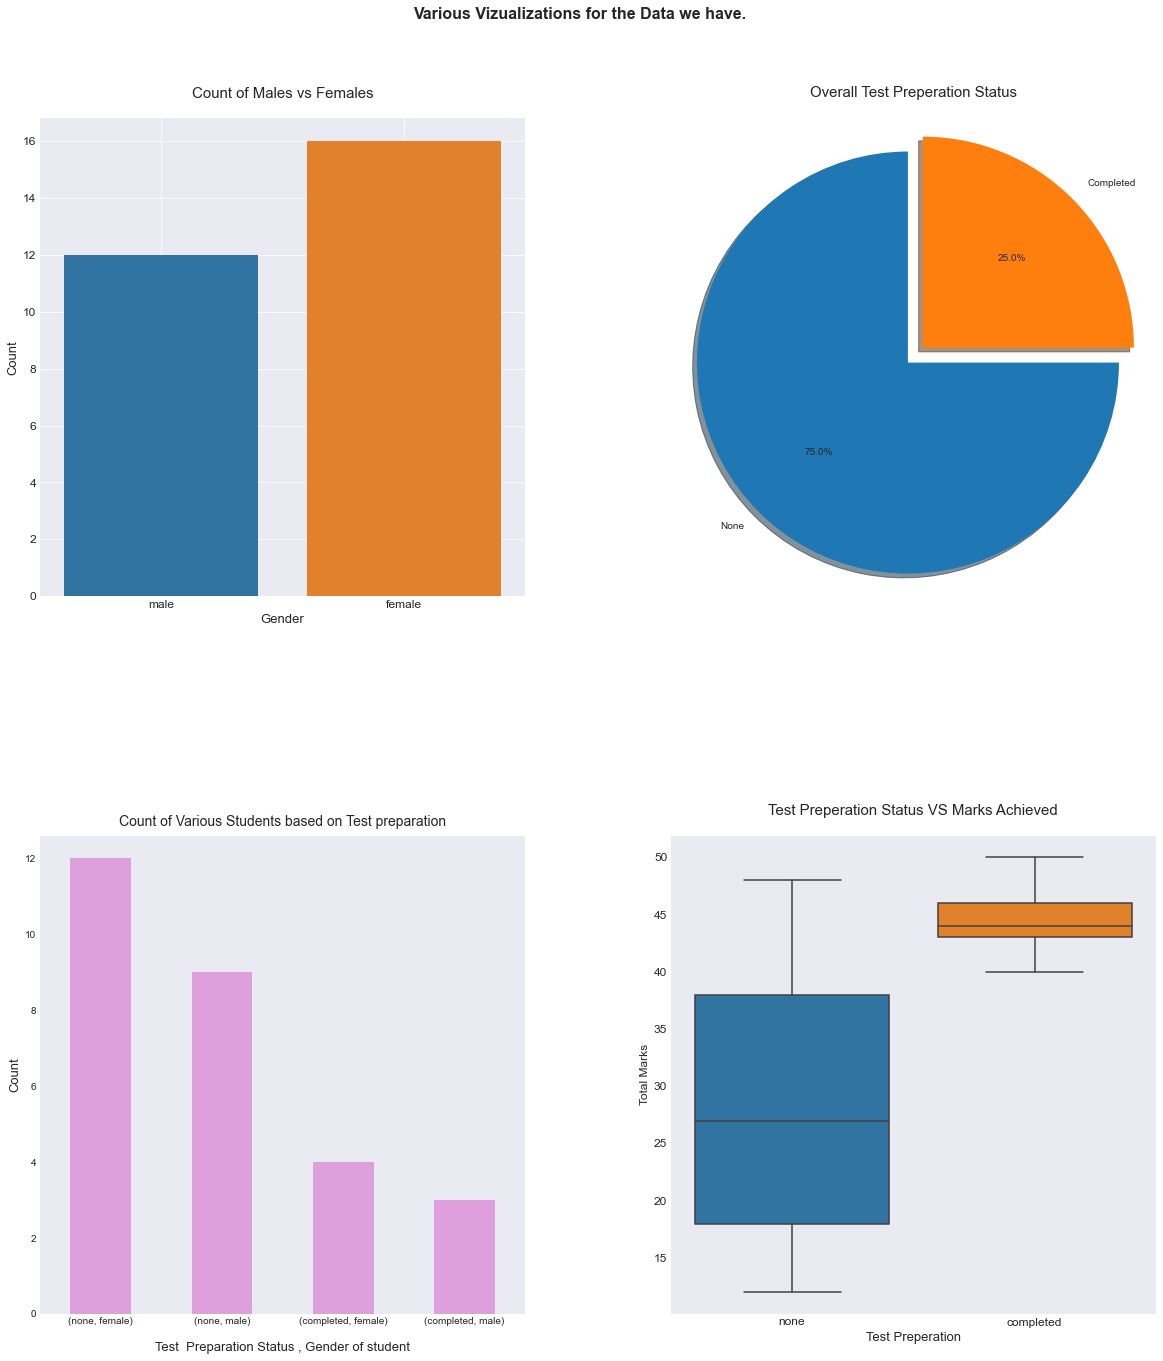

In [10]:
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(nrows=2, ncols=2, figsize = (20,22))

# creating labels for pie chart
labels = 'None', 'Completed'
sizes = [21,7]

# Plotting and customizing our axes

gender = sns.countplot(data=df, x = "Gender", ax = ax0 )
gender.set_title("Count of Males vs Females", fontsize = 15, pad = 20 )
gender.set_xlabel("Gender", fontsize = 13)
gender.set_ylabel("Count", fontsize = 13)
gender.tick_params(axis='both', which='major', labelsize=12)
gender.grid()


ax1.pie(sizes,labels=labels,autopct='%1.1f%%', explode = (0,0.1),shadow=True, startangle=90)
ax1.axis('equal');
ax1.set_title("Overall Test Preperation Status",fontsize = 15, pad = 21 )

df[["Test preparation","Gender"]].value_counts().plot(kind='bar', color = 'plum',rot = 0, ax = ax2)
ax2.set_title("Count of Various Students based on Test preparation", fontsize=14, pad=10)
ax2.set_xlabel("Test  Preparation Status , Gender of student",fontsize = 13, labelpad= 15)
ax2.set_ylabel("Count", fontsize= 13)
plt.tick_params(axis='both', which='major', labelsize=12)


sns.boxplot(y = "Total Marks", x = "Test preparation", data = df, ax = ax3)
ax3.set_title("Test Preperation Status VS Marks Achieved", fontsize = 15, pad = 21)
ax3.set_xlabel("Test Preperation", fontsize = 13)
ax3.set_ylabel("Total Marks", fontsize = 12);
plt.tick_params(axis='both', which='major', labelsize=12)

fig.suptitle("Various Vizualizations for the Data we have.", fontsize= 16, fontweight = "bold", y = 0.95);
plt.subplots_adjust(wspace= 0.3, hspace= 0.5)

> From the above analysis and charts we can state the following about the DataSet :
> * **1)** The Count of the Males and Females are as follows :
>> * `Males` : **12** & `Females` : **16**  

> * **2)** There are **7** students who have `completed the Test Preperation` and **21** Students who `Haven't taken the Test preperation`.

> * **3)** Half of the students have scored 33 Marks or above in the test.

> * **4)** We can see that the Marks obtained by the students who have done the test preperation `are better` than the scores obtained by people who havent done preperation. 

#### 

# Check whether female and male students scored the same marks.

In [11]:
# Prepping the data needed for testing

df_males = df[df["Gender"] == "male"][["Total Marks"]]

In [12]:
df_females = df[df["Gender"] == "female"][["Total Marks"]]

Stating the `Null` & `Alternate` Hypothesis for this study

> **Null Hypothesis, H0**: The Male and Female students have scored the same marks

> **Alternate Hypothesis, Ha**: The marks scored by Males & Females are not equal.

In [13]:
t_score, p_value = ttest_ind(df_females,df_males)
print("The calulated T score & p-value are : \n  \nt-score = %0.3f , \np-value = %0.3f \n" % (t_score, p_value))

alpha  = 0.05

if p_value > alpha:
    print("Unable to Reject Null Hypothesis")
elif p_value < alpha:
    print("We Reject the Null Hypothesis")

The calulated T score & p-value are : 
  
t-score = 0.694 , 
p-value = 0.494 

Unable to Reject Null Hypothesis


> **From the above we can conclude that:**
> * We're `unable to REJECT` the Null Hypothesis.
> * The Boys and girls have scored similar marks

# Checking whether test preparation helped the students

Stating the `Null` & `Alternate` Hypothesis

> **Null Hypothesis, H0**: The test preperation didn't help the students.

> **Alternate Hypothesis, Ha**: The Test preparation has helped the students in increasing their marks.

In [14]:
df_prepped = df[df["Test preparation"] == "completed"][["Total Marks"]]

In [15]:
df_not_prepped = df[df["Test preparation"] == "none"][["Total Marks"]]

In [16]:
t_score, p_val = ttest_ind(df_prepped,df_not_prepped, alternative="greater")
print("The calulated T score & p-value are : \n  \nt-score = %0.3f , \np-value = %0.3f \n" % (t_score, p_val))

alpha = 0.05 # The degree of Freedom is n-1, i.e. 28-1 = 27

if p_val < alpha:
    print("We Reject the Null Hypothesis")
elif p_val > alpha:
    print("We are unable to Reject the Null Hypothesis")

The calulated T score & p-value are : 
  
t-score = 3.614 , 
p-value = 0.001 

We Reject the Null Hypothesis


**Based on the above findings we can say that:**

> * For this study, `we'll reject` the Null Hypothesis. i.e. reject the claim that the test preperation hasn't helped the students.

> * The test preperation has helped the students increase their score. 